# 1. Installing and import the right dependencies

In [4]:
import tensorflow as tf 
import os 
import matplotlib.pyplot as plt
import numpy as np

# 2. Loading in the data 


In [2]:
data = tf.keras.utils.image_dataset_from_directory('data') 

Found 25000 files belonging to 2 classes.


In [3]:
data_iterator = data.as_numpy_iterator()

In [4]:
batch = data_iterator.next()

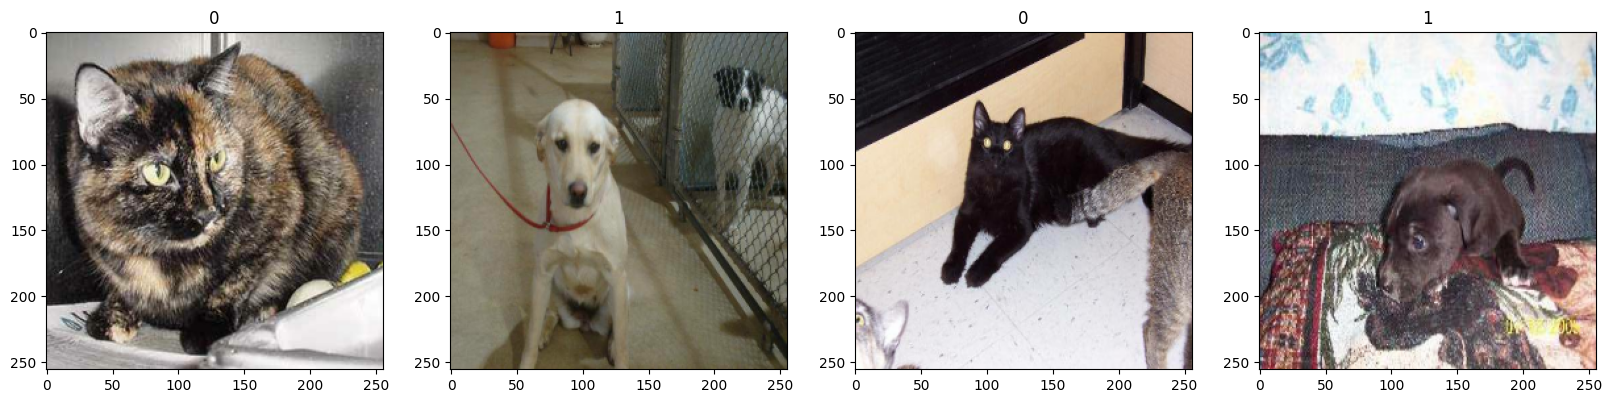

In [5]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3. Scaling the data

In [6]:
data = data.map(lambda x,y: (x/255, y)) #allows data to be transformed

In [7]:
data.as_numpy_iterator().next()

(array([[[[0.3549173 , 0.39805454, 0.23334865],
          [0.3823989 , 0.42553616, 0.26083028],
          [0.40164676, 0.44478402, 0.2800781 ],
          ...,
          [0.35890013, 0.35497856, 0.3438419 ],
          [0.3167509 , 0.31282935, 0.3049862 ],
          [0.26277575, 0.25885418, 0.25101104]],
 
         [[0.3761856 , 0.41932285, 0.25461698],
          [0.38397714, 0.4271144 , 0.2624085 ],
          [0.38328868, 0.42642596, 0.26172006],
          ...,
          [0.33679217, 0.3328706 , 0.32173395],
          [0.30702898, 0.3031074 , 0.29526427],
          [0.26519358, 0.261272  , 0.25342888]],
 
         [[0.4105223 , 0.45365956, 0.29449904],
          [0.40439934, 0.44753662, 0.28837606],
          [0.39207253, 0.43520978, 0.27604923],
          ...,
          [0.3502133 , 0.34629172, 0.33515507],
          [0.34859806, 0.3446765 , 0.33683336],
          [0.32808354, 0.32416198, 0.31631884]],
 
         ...,
 
         [[0.2549002 , 0.29918635, 0.3838524 ],
          [0.26243

In [8]:
len(data)

782

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Deep Learning Model

In [13]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Training 

In [19]:
logdir='logs'

In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [85]:

hist = model.fit(train, epochs=3, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/3
547/547 [==============================] - 189s 346ms/step - loss: 0.1596 - accuracy: 0.9374 - val_loss: 0.8265 - val_accuracy: 0.7696
Epoch 2/3
547/547 [==============================] - 176s 321ms/step - loss: 0.0977 - accuracy: 0.9643 - val_loss: 0.9403 - val_accuracy: 0.7494
Epoch 3/3
547/547 [==============================] - 164s 300ms/step - loss: 0.0684 - accuracy: 0.9774 - val_loss: 1.0430 - val_accuracy: 0.7558


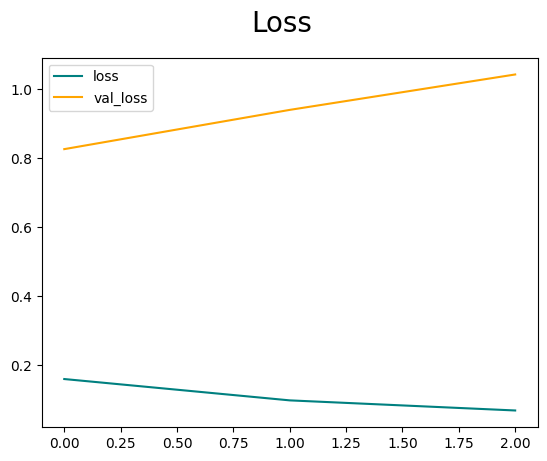

In [86]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Text(0.5, 1.0, 'Accuracy Curves')

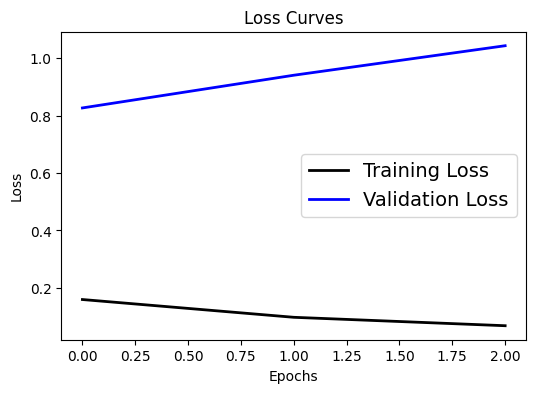

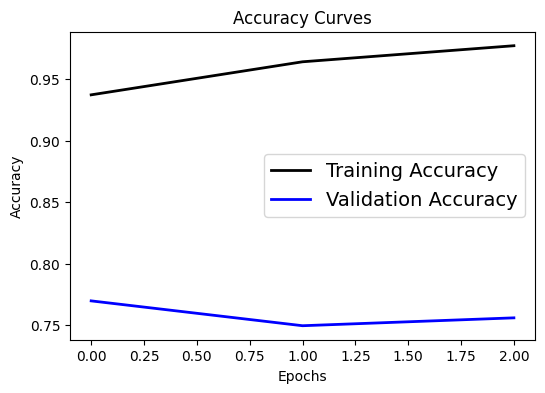

In [87]:
plt.figure(figsize=[6,4])
plt.plot(hist.history['loss'], 'black', linewidth=2.0)
plt.plot(hist.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Plotting the accuracy curve
plt.figure(figsize=[6,4])
plt.plot(hist.history['accuracy'], 'black', linewidth=2.0)
plt.plot(hist.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

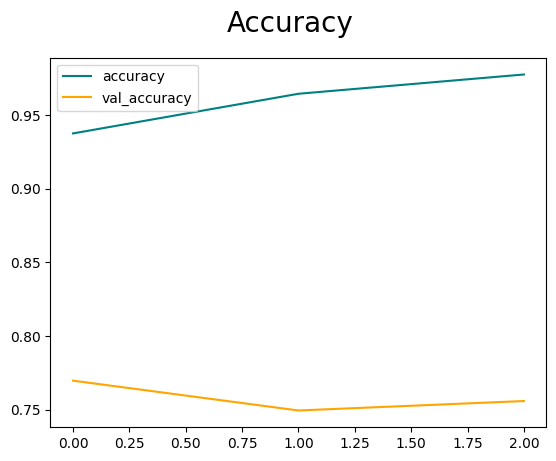

In [89]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [90]:

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [91]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [92]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 71ms/step


In [94]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.7210271, shape=(), dtype=float32) tf.Tensor(0.81426334, shape=(), dtype=float32) tf.Tensor(0.74399036, shape=(), dtype=float32)


In [2]:
import cv2

In [3]:
img = cv2.imread('12348.jpg')
plt.imshow(img)
plt.show()

NameError: name 'plt' is not defined

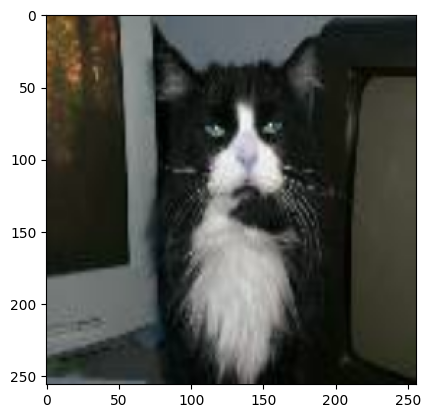

In [145]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [146]:

yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [147]:
yhat

array([[0.17311828]], dtype=float32)

In [148]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Cat
